João Paulo Paixão Rocha, RA: 156408

Gabriel Schrader Vilas Boas, RA: 150981

Luigi Rufca Catelli Fernandez, RA:156700

# Descrição Geral do Sistema Simulado

Para este projeto, utilizamos as seguintes fórmulas:

Oscilador de Relaxamento de van der Pol com acoplamento:

$
\frac{dx_i}{dt} = 3x_i - x_i^3 + 2 - y_i + ρ + S_i
$

$
\frac{dy_i}{dt} = 𝜺( α(1+tanh(x_i/ β)) - y_i)
$

# Parâmetros da Simulação

### Simulação 01:
Nesta simulação, será realizada a sincronização dos neurônios com 100% de neurônios ativos e acoplamento. Abaixo, temos os parâmetros desta simulação em específico.

- $N$ = 500 - número de neurônios
- $\alpha = 6$ - Alfa
- $\beta = 0.1$ - Beta
- $\theta = 0.5 $ - Theta
- $E = 0.02 $ - Epsilon
- $w ij = 1$ - força de acoplamento
- $Tmax = 1000$ - tempo limite da simulação

### Simulação 02:
Nesta simulação, realizaremos a sincronização dos neurônios com aproximadamente 50% dos neurônios ativos e acoplamento incluso. Abaixo, temos os parâmetros desta simulação em específico.

- $N$ = 500 - número de neurônios
- $\alpha = 4$ - Alfa
- $\beta = 0.2$ - Beta
- $\theta = 0.4 $ - Theta
- $E = 0.015 $ - Epsilon
- $w ij = 0.5$ - força de acoplamento
- $Tmax = 1000$ - tempo limite da simulação


In [ ]:
# Bibliotecas
import math
from random import uniform, random
import numpy as np
from matplotlib import pyplot as plt

# Funcionamento de um Neuronio
Gráficos para o funcionamento de um neurônio

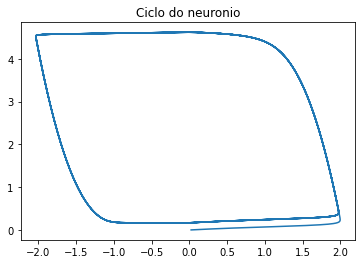

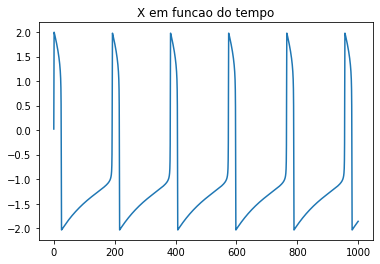

In [ ]:
DT = 0.01
TMax = 1000
TAM = 500
Ia = 0.2
Ii = -0.02
wij = 1

a = 6
E = 0.02
b = 0.1
theta = 0.5

xi=0
yi=0

#usar matriz tempo x neuronios
tl = np.arange(DT, TMax, DT)
xl = []
yl = []

for t in np.arange(DT, TMax, DT):
    xi = xi + (3 * xi - xi**3 + 2 - yi + Ia) * DT
    yi = yi + (E * (a * (1 + np.tanh((xi / b))) - yi)) * DT

    xl.append(xi)
    yl.append(yi)

plt.title("Ciclo do neuronio")
plt.plot(xl,yl)
plt.show()
plt.title("X em funcao do tempo")
plt.plot(tl,xl)
plt.show()


# Simulação 01 - Cálculos e Resultados

## Parâmetros

In [ ]:
# Parâmetros
DT = 0.01
TMax = 1000   # Tempo limite
N = 500       # Número de neurônios
Ia = 0.2      # I ativo
Ii = -0.02    # I inativo
wij = 1       # Força de acoplamento

a = 6         # Alfa
E = 0.02      # Epsilon
b = 0.1       # Beta
theta = 0.5   # Theta

xi = 0  # x inicial
yi = 0  # y inicial

#usar matriz tempo x neuronios
tl = np.arange(DT, TMax, DT)

matrizx = [[0 for j in range(len(tl))]for i in range(N)]      # matriz com valores de x
matrizy = [[0 for j in range(len(tl))]for i in range(N)]      # matriz com valores de y
listaS = [[0 for j in range(len(tl))]for i in range(N)]       # matriz com valores de Si

##Cálculos

In [ ]:
# funcao de acoplamento
count = 0
for t in np.arange(DT, TMax, DT):#tempo
    for i in range(N):#neuronios
        Si = 0
        Hd = 0
        He = 0
        # indice do neuronio antes e depois do neuronio atual
        if count == 0:
            xi = uniform(-2, 2)
            yi = uniform(0, 4)
            if i  < N - 1:
                if (matrizx[i+1][count] - theta) >= 0:
                    Hd = 1
                if (matrizx[i-1][count] - theta) >= 0:
                    He = 1
            else:
                if (matrizx[0][count] - theta) >= 0:
                    Hd = 1
                if (matrizx[i-1][count] - theta) >= 0:
                    He = 1

        elif count > 0:
            xi = matrizx[i][count-1]
            yi = matrizy[i][count-1]
            if i  < N - 1:
                if (matrizx[i+1][count - 1] - theta) >= 0:
                    Hd = 1
                if (matrizx[i-1][count - 1] - theta) >= 0:
                    He = 1
            else:
                if (matrizx[0][count - 1] - theta) >= 0:
                    Hd = 1
                if (matrizx[i-1][count - 1] - theta) >= 0:
                    He = 1
        
        Si = wij*(He) + wij*(Hd)        
        listaS[i][count] = Si

        if count == 0:
            xi = xi + (3 * xi - xi**3 + 2 - yi + Ia + Si) * DT
            yi = yi + (E * (a * (1 + np.tanh((xi / b))) - yi)) * DT
        else:
            xi = xi + (3 * xi - xi**3 + 2 - yi + Ia + Si + listaS[i][count - 1]) * DT
            yi = yi + (E * (a * (1 + np.tanh((xi / b))) - yi)) * DT

        Dxi = xi
        Dyi = yi
        
        matrizx[i][count] = Dxi
        matrizy[i][count] = Dyi
    count += 1

## Gráficos e Análises

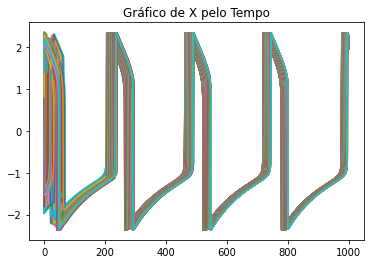

In [ ]:
# Plot do grafico
for i in range(N):
    plt.title("Gráfico de X pelo Tempo")
    plt.plot(tl, matrizx[i])
plt.show()

Nesta simulação, o tempo para se atingir a sincronização entre os neurônios é de pouco mais de 1000, pois é possível observar que os neurônios convergem. Nota-se que a força de acoplamento é extremamente importante para que este tempo de sincronização seja reduzido. Analisando mais especificamente neste caso, temos que, graças a força de acoplamento elevada, a sincronização se dá de forma rápida, mesmo com o elevado número de neurônios (500). Se esta força não tiver grandes valores, a sincronização ocorre, só que em tempos muito maiores do que vemos neste caso. Outro fator que torna a sincronização mais demorada, juntamente da força de acoplamento, é o número de neurônios, como pode-se observar neste gráfico acima, pois quanto mais neurônios, mais difícil de todos se sincronizarem. Além disso, deve-se lembrar que o número de neurônios ativos neste exemplo foi de 100%.

# Simulação 02 - Cálculos e Resultados

## Parâmetros

In [ ]:
# Parâmetros
DT = 0.01
TMax = 1000
N = 500      # Número de neurônios
Ia = 0.2      # I ativo
Ii = -0.02    # I inativo
wij = 0.5     # Força de acoplamento

a = 4         # Alfa
E = 0.015      # Epsilon
b = 0.2       # Beta
theta = 0.4   # Theta

xi = 0  # x inicial
yi = 0  # y inicial

#usar matriz tempo x neuronios
tl = np.arange(DT, TMax, DT)

matrizx = [[0 for j in range(len(tl))]for i in range(N)]      # matriz com valores de x
matrizy = [[0 for j in range(len(tl))]for i in range(N)]      # matriz com valores de y
listaS = [[0 for j in range(len(tl))]for i in range(N)]       # matriz com valores de Si
listaI = [uniform(0,1) for i in range(N)]

##Cálculos

In [ ]:
# funcao de acoplamento
count = 0
for t in np.arange(DT, TMax, DT):#tempo
    for i in range(N):#neuronios
        Si = 0
        Hd = 0
        He = 0
        # indice do neuronio antes e depois do neuronio atual
        if count == 0:
            xi = uniform(-2, 2)
            yi = uniform(0, 4)
            if i  < N - 1:
                if (matrizx[i+1][count] - theta) >= 0:
                    Hd = 1
                if (matrizx[i-1][count] - theta) >= 0:
                    He = 1
            else:
                if (matrizx[0][count] - theta) >= 0:
                    Hd = 1
                if (matrizx[i-1][count] - theta) >= 0:
                    He = 1

        elif count > 0:
            xi = matrizx[i][count-1]
            yi = matrizy[i][count-1]
            if i  < N - 1:
                if (matrizx[i+1][count - 1] - theta) >= 0:
                    Hd = 1
                if (matrizx[i-1][count - 1] - theta) >= 0:
                    He = 1
            else:
                if (matrizx[0][count - 1] - theta) >= 0:
                    Hd = 1
                if (matrizx[i-1][count - 1] - theta) >= 0:
                    He = 1
        
        Si = wij*(He) + wij*(Hd)        
        listaS[i][count] = Si

        aux = listaI[i]
        if aux > 0.5:
          if count == 0:
              xi = xi + (3 * xi - xi**3 + 2 - yi + Ia + Si) * DT
              yi = yi + (E * (a * (1 + np.tanh((xi / b))) - yi)) * DT
          else:
              xi = xi + (3 * xi - xi**3 + 2 - yi + Ia + Si + listaS[i][count - 1]) * DT
              yi = yi + (E * (a * (1 + np.tanh((xi / b))) - yi)) * DT
        else:
          if count == 0:
              xi = xi + (3 * xi - xi**3 + 2 - yi + Ii + Si) * DT
              yi = yi + (E * (a * (1 + np.tanh((xi / b))) - yi)) * DT
          else:
              xi = xi + (3 * xi - xi**3 + 2 - yi + Ii + Si + listaS[i][count - 1]) * DT
              yi = yi + (E * (a * (1 + np.tanh((xi / b))) - yi)) * DT

        Dxi = xi
        Dyi = yi
        
        matrizx[i][count] = Dxi
        matrizy[i][count] = Dyi
    count += 1

## Gráficos e Análises

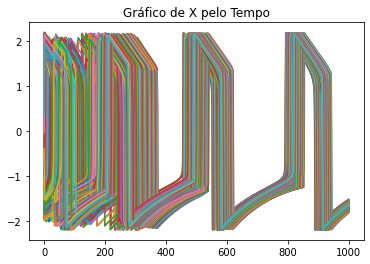

In [ ]:
# Plot do grafico
for i in range(N):
    plt.title("Gráfico de X pelo Tempo")
    plt.plot(tl, matrizx[i])
plt.show()

Na simulação 2, temos uma forca de acoplamento menor, e outros parametros diferente. Também nessa simulação, utilizamos 50% dos neuronios ativos. é possível perceber que por conta da menor forca de acoplamento, os neuronios levam mais tempo para sincronizar, sendo, neste caso, muito maior que 1000. Porém, claramente, os neurônios estão entrando em sincronia, uma vez que é perceptível que os neurônios estão ficando mais próximos um do outro, mas o tempo não foi suficiente para que houvesse a sincronização completa. Os outros parâmetros influenciaram a forma do pulso de cada neurônio, por isso comecaram tão diferentes.
